# Task 2: Data Acquisition & Initial Visualization

You may use the provided USGS streamflow datasets or a time-series dataset of your own choosing, provided it has at least daily resolution.

Load Data: Read the raw data into a Pandas DataFrame from your  data/ folder.

Process the data: Subset the data so that all of the data is overlapping and is 6 years in length.
Exploratory Data Analysis (EDA): Create an initial time-series plot of the data, ensure the plot has a title, axes labels, legend. etc. Create a figure with four subplots to visualize the data.

Compare and Contrast: How do the different streams compare (timing, magnitude, other)?




In [17]:
# Import Packages

import pandas as pd
import matplotlib.pyplot as plt

#### Load Data

In [18]:
# Example for one file
df = pd.read_csv("../data/09289500_1980_2020.csv")
print(df.head())  
print(df.columns)       


     Datetime  USGS_flow    variable  USGS_ID measurement_unit     qualifiers  \
0  1984-10-01      84.15  streamflow  9289500            ft3/s          ['A']   
1  1984-10-02        NaN  streamflow  9289500            ft3/s          ['A']   
2  1984-10-03        NaN  streamflow  9289500            ft3/s          ['A']   
3  1984-10-04        NaN  streamflow  9289500            ft3/s          ['A']   
4  1984-10-05        NaN  streamflow  9289500            ft3/s  ['A', '[91]']   

   series  
0       0  
1       0  
2       0  
3       0  
4       0  
Index(['Datetime', 'USGS_flow', 'variable', 'USGS_ID', 'measurement_unit',
       'qualifiers', 'series'],
      dtype='object')


In [19]:
# Define file paths and labels
files = {
    "Lake Fork River": "../data/09289500_1980_2020.csv",
    "Green River": "../data/09261000_1980_2020.csv",
    "Colorado River Potash": "../data/09185600_1980_2020.csv",
    "Colorado River Cisco": "../data/09180500_1980_2020.csv"
}

# Read CSVs into a dictionary of DataFrames
data = {label: pd.read_csv(path, parse_dates=['Datetime'], index_col='Datetime') 
        for label, path in files.items()}

# Quick check
for label, df in data.items():
    print(label, df.shape)
    print(df.head(1))
    print(" ")


Lake Fork River (13110, 6)
            USGS_flow    variable  USGS_ID measurement_unit qualifiers  series
Datetime                                                                      
1984-10-01      84.15  streamflow  9289500            ft3/s      ['A']       0
 
Green River (14610, 6)
            USGS_flow    variable  USGS_ID measurement_unit     qualifiers  \
Datetime                                                                     
1980-09-30     1320.0  streamflow  9261000            ft3/s  ['A', '[91]']   

            series  
Datetime            
1980-09-30       0  
 
Colorado River Potash (2162, 6)
            USGS_flow    variable  USGS_ID measurement_unit qualifiers  series
Datetime                                                                      
2014-10-30   4510.278  streamflow  9185600            ft3/s      ['A']       0
 
Colorado River Cisco (12418, 6)
            USGS_flow    variable  USGS_ID measurement_unit     qualifiers  \
Datetime                      

#### Find most recent contiuous 6 year period

In [20]:
# Loop through datasets to inspect date ranges and gaps
for label, df in data.items():
    print(f"=== {label} ===")
    
    first_date = df.index.min()
    last_date  = df.index.max()
    print("First date:", first_date.date())
    print("Last date: ", last_date.date())
    
    # Compute gaps in days between consecutive rows
    gaps = df.index.to_series().diff().dt.days
    large_gaps = gaps[gaps > 1]
    
    if not large_gaps.empty:
        print("Gaps > 1 day found on these dates:")
        for date, gap in large_gaps.items():
            print(f"  {date.date()} (gap of {int(gap)} days)")
    else:
        print("No gaps > 1 day")
    
    print(" ")


=== Lake Fork River ===
First date: 1984-10-01
Last date:  2020-09-29
Gaps > 1 day found on these dates:
  1990-10-20 (gap of 39 days)
 
=== Green River ===
First date: 1980-09-30
Last date:  2020-09-29
No gaps > 1 day
 
=== Colorado River Potash ===
First date: 2014-10-30
Last date:  2020-09-29
No gaps > 1 day
 
=== Colorado River Cisco ===
First date: 1986-10-01
Last date:  2020-09-29
No gaps > 1 day
 


In [21]:
# Define 6-year period
subset_start = pd.Timestamp("2014-10-30")
subset_end   = pd.Timestamp("2020-9-29")

# Subset all datasets
data_6yr = {label: df.loc[subset_start:subset_end] for label, df in data.items()}

# Confirm shapes and date ranges
for label, df in data_6yr.items():
    print(f"{label}: {df.shape}, {df.index.min().date()} to {df.index.max().date()}")

Lake Fork River: (2162, 6), 2014-10-30 to 2020-09-29
Green River: (2162, 6), 2014-10-30 to 2020-09-29
Colorado River Potash: (2162, 6), 2014-10-30 to 2020-09-29
Colorado River Cisco: (2162, 6), 2014-10-30 to 2020-09-29


#### Single Plot

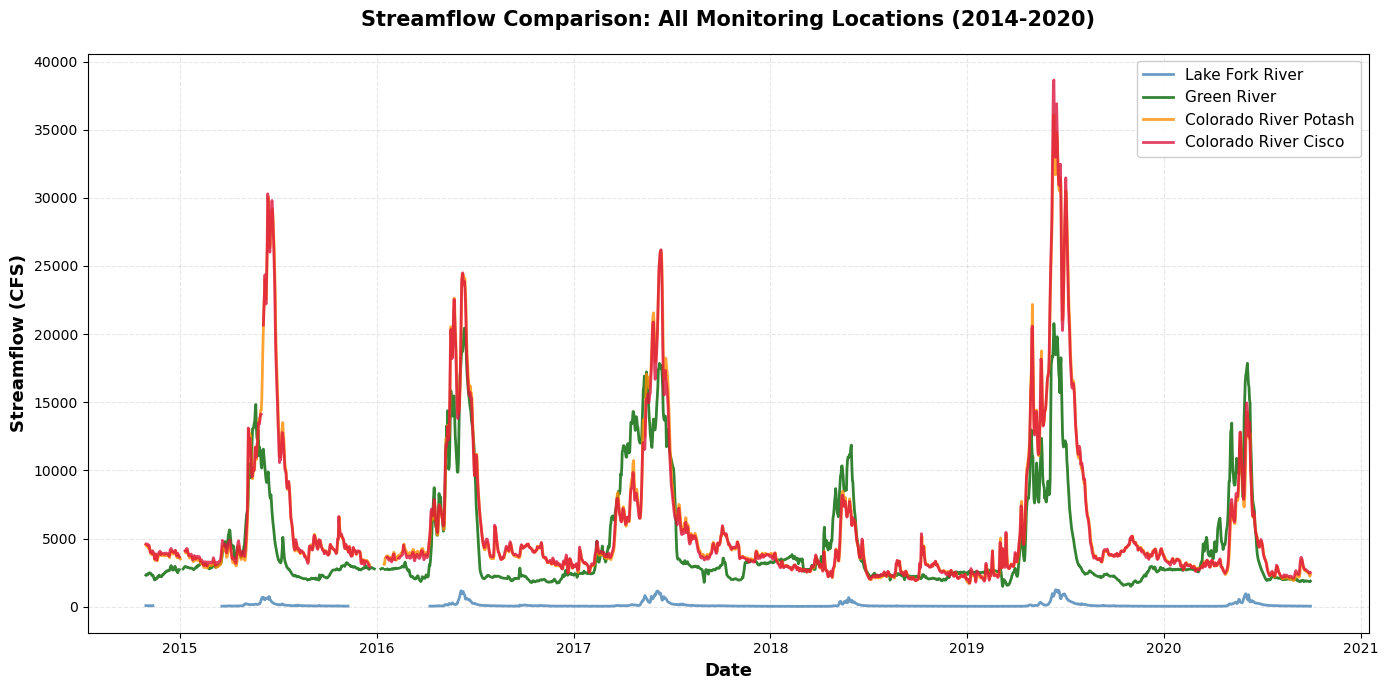

In [22]:
fig, ax = plt.subplots(figsize=(14, 7))

# Define colors for each stream
colors = {'Lake Fork River': 'steelblue', 'Green River': 'darkgreen', 
          'Colorado River Potash': 'darkorange', 'Colorado River Cisco': 'crimson'}

# Plot all streams
for label, df in data_6yr.items():
    ax.plot(df.index, df['USGS_flow'], label=label, linewidth=2, color=colors[label], alpha=0.8)

# Formatting
ax.set_xlabel('Date', fontsize=13, fontweight='bold')
ax.set_ylabel('Streamflow (CFS)', fontsize=13, fontweight='bold')
ax.set_title('Streamflow Comparison: All Monitoring Locations (2014-2020)', 
             fontsize=15, fontweight='bold', pad=20)
ax.legend(loc='upper right', fontsize=11, framealpha=0.95)
ax.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


#### Multiple Plots

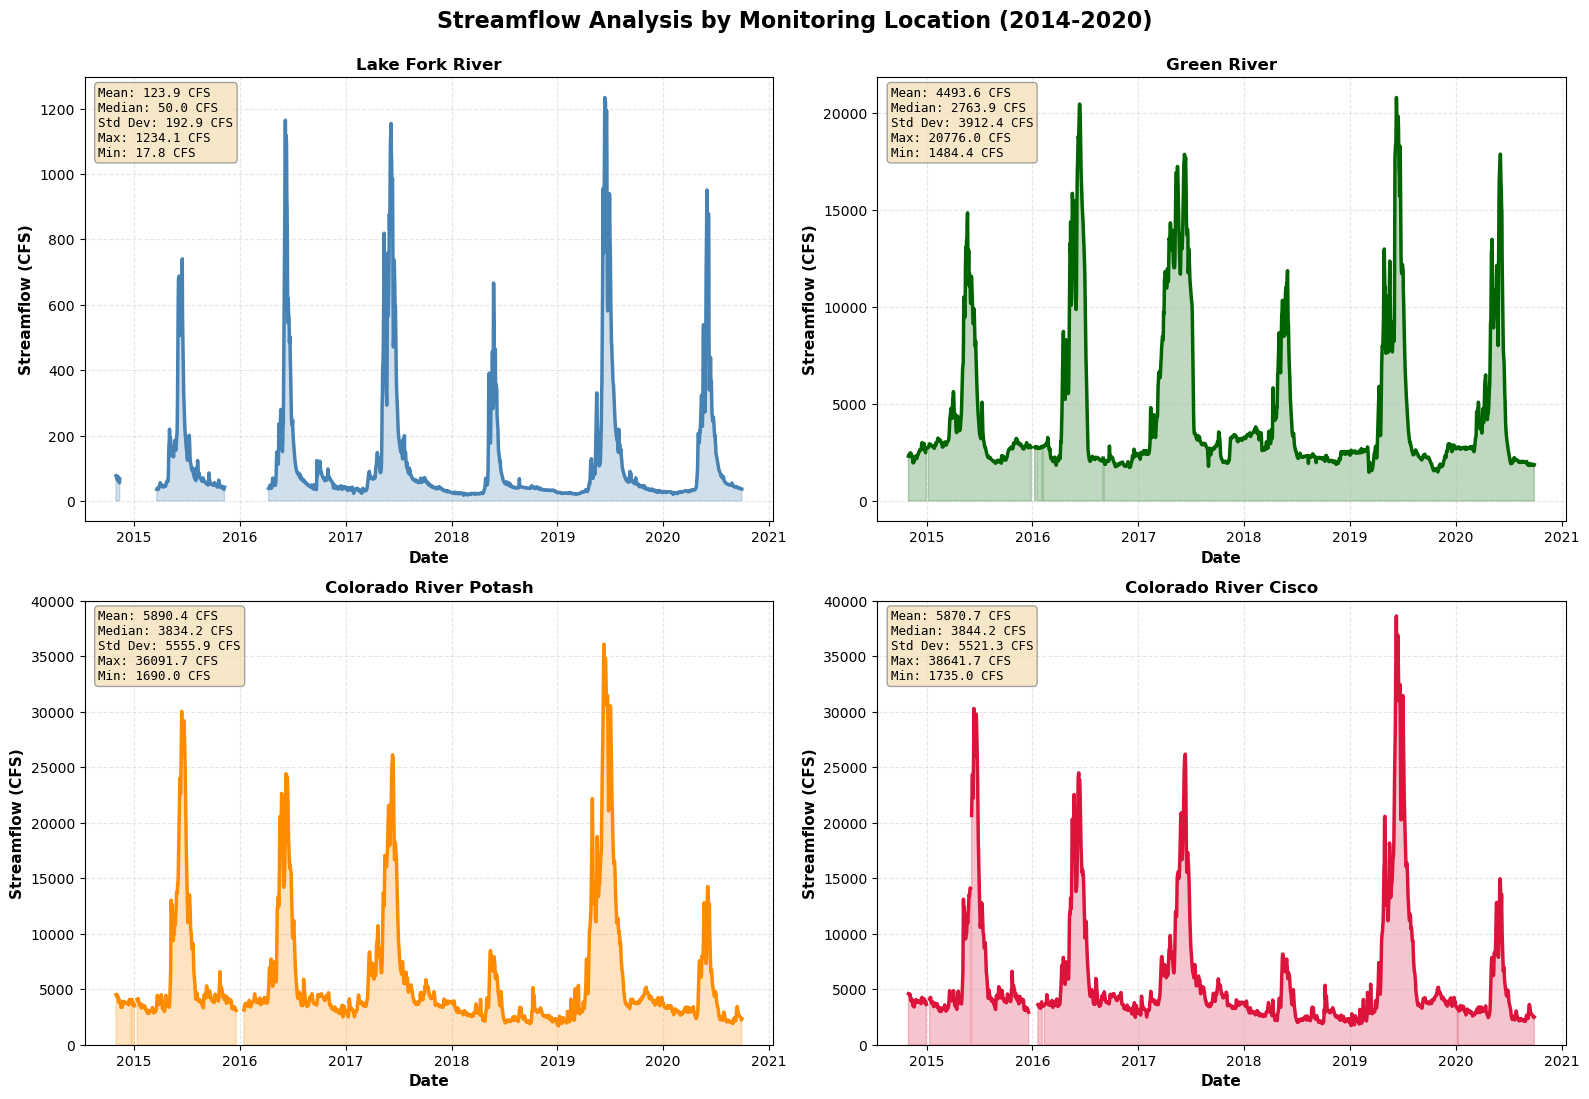

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(16, 11))
fig.suptitle('Streamflow Analysis by Monitoring Location (2014-2020)', 
             fontsize=16, fontweight='bold', y=0.995)

streams_list = list(data_6yr.keys())
colors_list = list(colors.values())

for idx, (stream, ax, color) in enumerate(zip(streams_list, axes.flat, colors_list)):
    df = data_6yr[stream]
    
    # Plot streamflow with filled area
    ax.plot(df.index, df['USGS_flow'], color=color, linewidth=2.5, label=stream)
    ax.fill_between(df.index, df['USGS_flow'], alpha=0.25, color=color)

    # Set y-axis range for bottom row plots
    if idx >= 2:
        ax.set_ylim(0, 40000)
    
    # Formatting
    ax.set_xlabel('Date', fontsize=11, fontweight='bold')
    ax.set_ylabel('Streamflow (CFS)', fontsize=11, fontweight='bold')
    ax.set_title(stream, fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.tick_params(axis='both', labelsize=10)
    
    # Calculate and display statistics
    mean_flow = df['USGS_flow'].mean()
    max_flow = df['USGS_flow'].max()
    min_flow = df['USGS_flow'].min()
    median_flow = df['USGS_flow'].median()
    std_flow = df['USGS_flow'].std()
    
    stats_text = (f'Mean: {mean_flow:.1f} CFS\n'
                  f'Median: {median_flow:.1f} CFS\n'
                  f'Std Dev: {std_flow:.1f} CFS\n'
                  f'Max: {max_flow:.1f} CFS\n'
                  f'Min: {min_flow:.1f} CFS')
    
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, fontsize=9, 
            verticalalignment='top', fontfamily='monospace',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7, edgecolor='gray'))

plt.tight_layout()
plt.show()


# Task 3: Temporal Resampling & Statistical Aggregation
Engineers often need to move between "instantaneous" values and "volumetric" averages. Use Pandas to resample your data.

    Weekly Mean: Resample the daily data to a Weekly mean.

    Monthly Volumetric: Resample the data to a Monthly total.

Visualization: Create a single multi-paneled figure comparing the three resolutions:

    Panel A: Daily (Raw)

    Panel B: Weekly Mean

    Panel C: Monthly Volume

    Panel D: Put the legend here

Ensure that all four streams are on each figure and labeled correctly, including a change of units, if necessary.

Compare and Contrast: How do the different streams compare (timing, magnitude, other), and how does the temporal resampling highlight similarities and differences between the streams?


#### Resample

In [24]:
# Weekly Mean
data_weekly = {}
for label, df in data_6yr.items():
    data_weekly[label] = df[['USGS_flow']].resample('W').mean()

# Monthly Total
data_monthly_taf = {}
for label, df in data_6yr.items():
    # Sum of daily flows over month (CFS × seconds/day)
    monthly_sum = df[['USGS_flow']].resample('ME').sum()
    
    # Conversions
    cubic_feet = monthly_sum * 86400
    acre_feet = cubic_feet / 43560
    taf = acre_feet / 1000
    
    data_monthly_taf[label] = taf

#print(f"Weekly mean shape: {data_weekly['Lake Fork River'].shape}")
#print(f"Monthly volumetric shape: {data_monthly['Lake Fork River'].shape}")

#### 4 Panel Figure

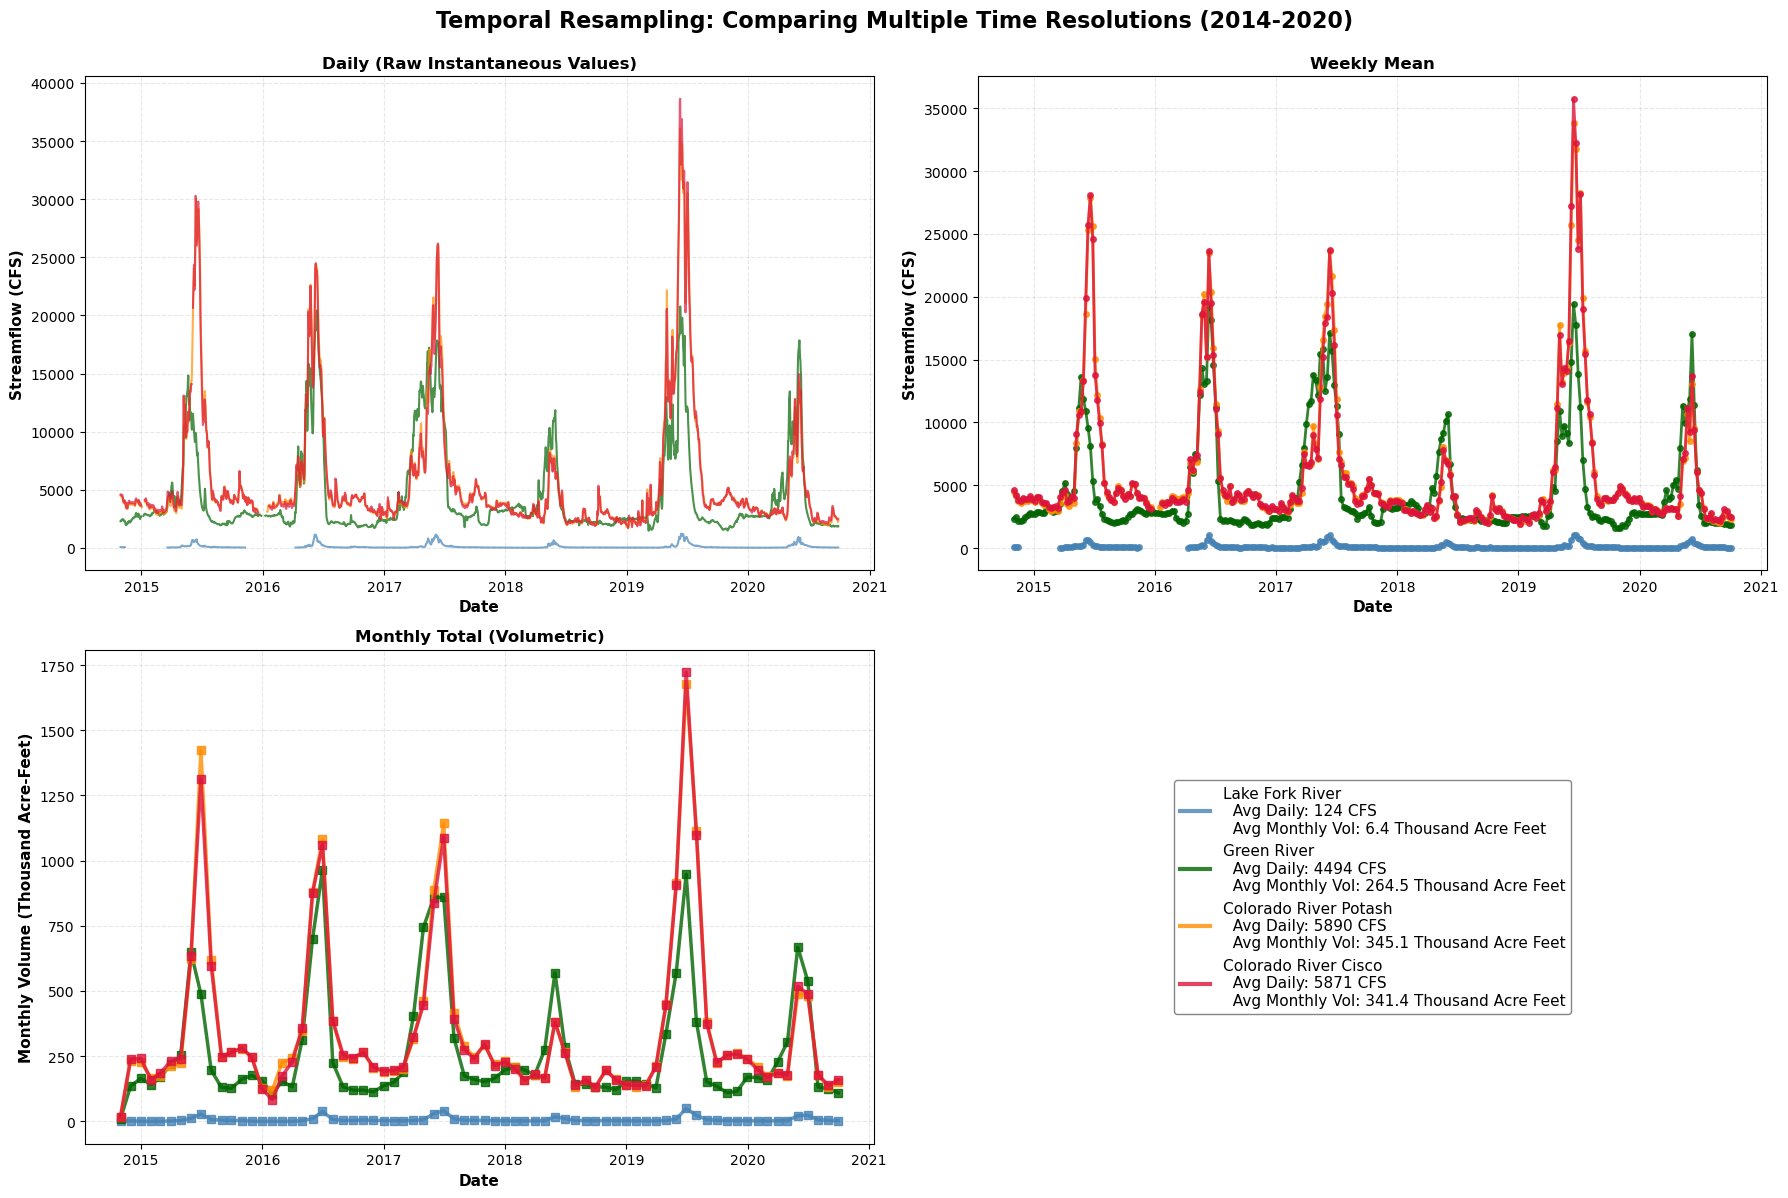

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Temporal Resampling: Comparing Multiple Time Resolutions (2014-2020)', 
             fontsize=16, fontweight='bold', y=0.995)

streams_list = list(data_6yr.keys())
colors_dict = {'Lake Fork River': 'steelblue', 'Green River': 'darkgreen', 
               'Colorado River Potash': 'darkorange', 'Colorado River Cisco': 'crimson'}

# ===== PANEL A: Daily (Raw) Data =====
ax_daily = axes[0, 0]
for label in streams_list:
    ax_daily.plot(data_6yr[label].index, data_6yr[label]['USGS_flow'], 
                  label=label, linewidth=1.5, color=colors_dict[label], alpha=0.7)
ax_daily.set_xlabel('Date', fontsize=11, fontweight='bold')
ax_daily.set_ylabel('Streamflow (CFS)', fontsize=11, fontweight='bold')
ax_daily.set_title('Daily (Raw Instantaneous Values)', fontsize=12, fontweight='bold')
ax_daily.grid(True, alpha=0.3, linestyle='--')
ax_daily.tick_params(axis='both', labelsize=10)

# ===== PANEL B: Weekly Mean =====
ax_weekly = axes[0, 1]
for label in streams_list:
    ax_weekly.plot(data_weekly[label].index, data_weekly[label]['USGS_flow'], 
                   label=label, linewidth=2, color=colors_dict[label], alpha=0.8, marker='o', markersize=4)
ax_weekly.set_xlabel('Date', fontsize=11, fontweight='bold')
ax_weekly.set_ylabel('Streamflow (CFS)', fontsize=11, fontweight='bold')
ax_weekly.set_title('Weekly Mean', fontsize=12, fontweight='bold')
ax_weekly.grid(True, alpha=0.3, linestyle='--')
ax_weekly.tick_params(axis='both', labelsize=10)

# ===== PANEL C: Monthly Volumetric (Total) =====
ax_monthly = axes[1, 0]
for label in streams_list:
    ax_monthly.plot(data_monthly_taf[label].index, data_monthly_taf[label]['USGS_flow'], 
                    label=label, linewidth=2.5, color=colors_dict[label], alpha=0.8, marker='s', markersize=6)
ax_monthly.set_xlabel('Date', fontsize=11, fontweight='bold')
ax_monthly.set_ylabel('Monthly Volume (Thousand Acre-Feet)', fontsize=11, fontweight='bold')
ax_monthly.set_title('Monthly Total (Volumetric)', fontsize=12, fontweight='bold')
ax_monthly.grid(True, alpha=0.3, linestyle='--')
ax_monthly.tick_params(axis='both', labelsize=10)

# ===== PANEL D: Legend Only =====
ax_legend = axes[1, 1]
ax_legend.axis('off')  # Turn off axis for legend panel

# Create custom legend with stream information
legend_labels = []
legend_handles = []
for label in streams_list:
    daily_mean = data_6yr[label]['USGS_flow'].mean()
    monthly_mean_vol = data_monthly_taf[label].iloc[:, 0].mean()
    
    from matplotlib.lines import Line2D
    legend_line = Line2D([0], [0], color=colors_dict[label], linewidth=3, alpha=0.8)
    legend_labels.append(f'{label}\n  Avg Daily: {daily_mean:.0f} CFS\n  Avg Monthly Vol: {monthly_mean_vol:.1f} Thousand Acre Feet')
    legend_handles.append(legend_line)

ax_legend.legend(legend_handles, legend_labels, loc='center', fontsize=11, 
                framealpha=0.95, frameon=True, edgecolor='gray', fancybox=True)

plt.tight_layout()
plt.show()


# Task 4: Comparative Analysis
Choose a "wet" year and a "dry" year from the volumetric analysis above, and select two locations: one below a reservoir and the other in a headwater catchment. Conduct the following comparative analysis.

Aggregation (wet year): within your plotting function to show the range of flow for each dataset (e.g., min/max for each day), and plot the wet year of interest for each stream.

Aggregation (dry year): within your plotting function to show the range of flow for each dataset (e.g., min/max for each day), and plot the dry year of interest.

Engineering Interpretation: Discuss how the timing of peak flow (e.g., snowmelt pulse) differs between your two compared sets.

#### Select two years and two streams

In [26]:
# Lake Fork River: Headwater Catchment
# Green River: Below Reservoir (regulated)

selected_streams = ['Lake Fork River', 'Green River']

# Extract 2017 (wet year) and 2018 (dry year)
year_2017 = pd.Timestamp('2017-01-01')
year_2017_end = pd.Timestamp('2017-12-31')
year_2018 = pd.Timestamp('2018-01-01')
year_2018_end = pd.Timestamp('2018-12-31')

data_2017 = {label: data_6yr[label].loc[year_2017:year_2017_end] for label in selected_streams}
data_2018 = {label: data_6yr[label].loc[year_2018:year_2018_end] for label in selected_streams}

print("2017 (Wet Year) Data Summary:")
print("="*80)
for label in selected_streams:
    annual_volume = data_monthly_taf[label].loc[year_2017:year_2017_end, 'USGS_flow'].sum()
    print(f"{label}: {len(data_2017[label])} days, Annual Volume: {annual_volume:.2f} TAF")

print("\n2018 (Dry Year) Data Summary:")
print("="*80)
for label in selected_streams:
    annual_volume = data_monthly_taf[label].loc[year_2018:year_2018_end, 'USGS_flow'].sum()
    print(f"{label}: {len(data_2018[label])} days, Annual Volume: {annual_volume:.2f} TAF")


2017 (Wet Year) Data Summary:
Lake Fork River: 365 days, Annual Volume: 108.01 TAF
Green River: 365 days, Annual Volume: 4368.76 TAF

2018 (Dry Year) Data Summary:
Lake Fork River: 365 days, Annual Volume: 48.59 TAF
Green River: 365 days, Annual Volume: 2529.92 TAF


#### Plot it

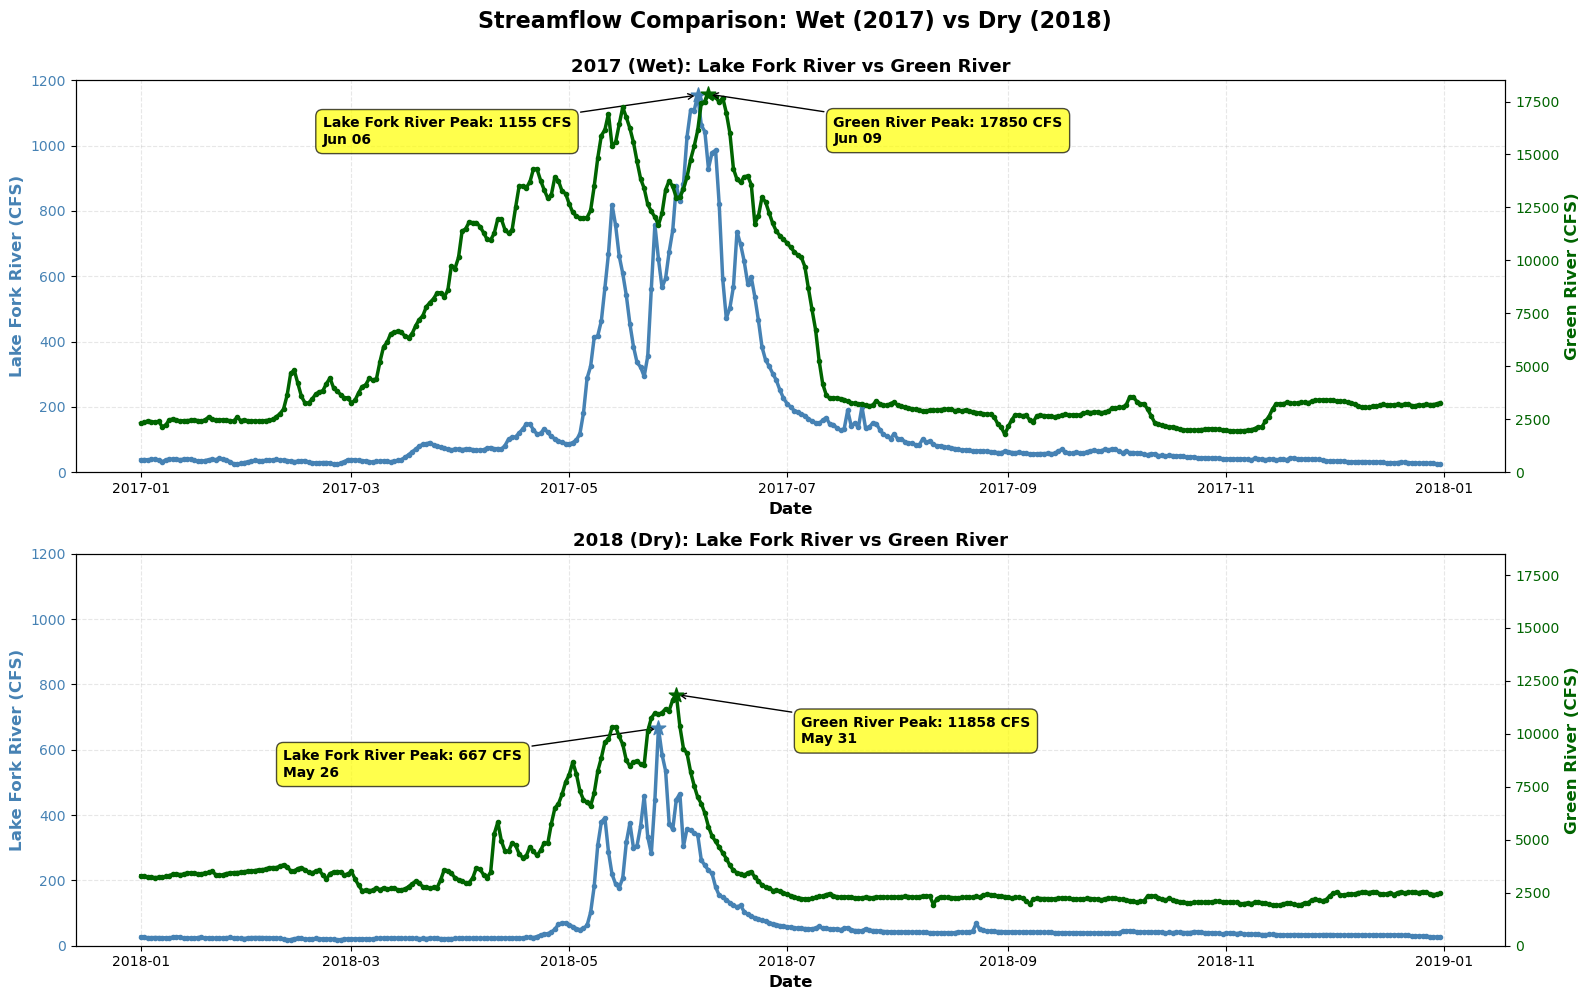

In [27]:
fig_years, axes = plt.subplots(2, 1, figsize=(16, 10))
fig_years.suptitle('Streamflow Comparison: Wet (2017) vs Dry (2018)', 
                   fontsize=16, fontweight='bold', y=0.995)

year_data = {'2017 (Wet)': data_2017, '2018 (Dry)': data_2018}

for idx, (year_label, data_dict) in enumerate(year_data.items()):
    ax = axes[idx]
    
    # Left axis: Lake Fork River
    ax.set_xlabel('Date', fontsize=12, fontweight='bold')
    ax.set_ylabel('Lake Fork River (CFS)', fontsize=12, fontweight='bold', color='steelblue')
    ax.tick_params(axis='y', labelcolor='steelblue')
    ax.plot(data_dict['Lake Fork River'].index, data_dict['Lake Fork River']['USGS_flow'], 
            color='steelblue', linewidth=2.5, marker='o', markersize=3, label='Lake Fork River (Headwater Catchment)')
    ax.set_ylim(0, 1200)

    # Right axis: Green River
    ax2 = ax.twinx()
    ax2.set_ylabel('Green River (CFS)', fontsize=12, fontweight='bold', color='darkgreen')
    ax2.tick_params(axis='y', labelcolor='darkgreen')
    ax2.plot(data_dict['Green River'].index, data_dict['Green River']['USGS_flow'], 
             color='darkgreen', linewidth=2.5, marker='o', markersize=3, label='Green River (Below Reservoir)')
    ax2.set_ylim(0, 18500)

    ax.set_title(f'{year_label}: Lake Fork River vs Green River', fontsize=13, fontweight='bold')
    
    # Peak markers and annotations with sides switched
    for label, axis, color in zip(['Lake Fork River', 'Green River'], [ax, ax2], ['steelblue', 'darkgreen']):
        peak_idx = data_dict[label]['USGS_flow'].idxmax()
        peak_flow = data_dict[label]['USGS_flow'].max()
        axis.scatter([peak_idx], [peak_flow], color=color, s=120, marker='*', zorder=5)
        
        # Adjust annotation position based on axis
        if label == 'Lake Fork River':
            xytext = (-270, -35)   # left of peak, below
        else:  # Green River
            xytext = (90, -35)   # right of peak, below
        
        axis.annotate(f'{label} Peak: {peak_flow:.0f} CFS\n{peak_idx.strftime("%b %d")}',
                      xy=(peak_idx, peak_flow), xytext=xytext, textcoords='offset points',
                      fontsize=10, fontweight='bold',
                      bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
                      arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

    ax.grid(True, alpha=0.3, linestyle='--')

fig_years.tight_layout()
plt.show()